# Importando as bibliotecas

In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import numpy as np

nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('averaged_perceptron_tagger_eng', quiet=True)
from datetime import datetime
from db import connection_db as conndb
from db import filters
from utils.plot_graphs import PlotGraphs
from utils.text_treatment import TextTreatment
from utils.text_vectorization import TextVectorization
from dateutil.relativedelta import relativedelta
from utils.nuvem_palavras import NuvemPalavras
from tqdm.auto import tqdm

tqdm.pandas()
from utils.busca_palavras import BuscaPalavras
from utils.facebook_prophet import FacebookProphet
from utils.estracao_interacao import ExtracaoInteracao

ERROR:prophet.plot:Importing plotly failed. Interactive plots will not work.


In [2]:
mongo_connection = conndb.MongoDBConnection(uri='mongodb://localhost:27017/', database_name='dadosVivamente',
                                            collection_name='dadosSemFiltros')
mongo_connection.connect()
collection = mongo_connection.collection

Conexão estabelecida com sucesso ao banco de dados.


In [3]:
collection_filters = filters.CollectionFilters(collection)
collection_filters.apply_pipeline1('dadosComFiltrosIniciais')
collection_filters.apply_pipeline2(7, 2, 'posts7anos2anos')
collection_filters.apply_pipeline3('postsComBDIAndInfos')
collection_filters.apply_pipeline4('postsComBDIAndInfosFiltroDataPosts')
data_inicio = datetime(2017, 12, 1)
data_fim = data_inicio - relativedelta(months=6)
collection_filters.apply_pipeline5('postsFiltradosPorData', data_inicio, data_fim)
collection = collection_filters.collection

INFO:root:A coleção já existe: dadosComFiltrosIniciais
INFO:root:A coleção já existe: posts7anos2anos
INFO:root:A coleção já existe: postsComBDIAndInfos
INFO:root:A coleção já existe: postsComBDIAndInfosFiltroDataPosts
INFO:root:A coleção já existe: postsFiltradosPorData


In [4]:
quant_usuario_nivel_0 = collection_filters.quant_users_cat('nivel', '$eq', 0)
quant_usuario_nivel_0_masculino = collection_filters.count_users_by_gender('nivel', '$eq', 0, 'M')
quant_usuario_nivel_0_feminino = collection_filters.count_users_by_gender('nivel', '$eq', 0, 'F')

quant_usuario_nivel_1 = collection_filters.quant_users_cat('nivel', '$eq', 1)
quant_usuario_nivel_1_masculino = collection_filters.count_users_by_gender('nivel', '$eq', 1, 'M')
quant_usuario_nivel_1_feminino = collection_filters.count_users_by_gender('nivel', '$eq', 1, 'F')

quant_usuario_nivel_2 = collection_filters.quant_users_cat('nivel', '$eq', 2)
quant_usuario_nivel_2_masculino = collection_filters.count_users_by_gender('nivel', '$eq', 2, 'M')
quant_usuario_nivel_2_feminino = collection_filters.count_users_by_gender('nivel', '$eq', 2, 'F')

quant_usuario_nivel_3 = collection_filters.quant_users_cat('nivel', '$eq', 3)
quant_usuario_nivel_3_masculino = collection_filters.count_users_by_gender('nivel', '$eq', 3, 'M')
quant_usuario_nivel_3_feminino = collection_filters.count_users_by_gender('nivel', '$eq', 3, 'F')

In [5]:
print('Quantidade de Usuários com nível 0:', quant_usuario_nivel_0)
print('Quantidade de Usuários do sexo Masculino com nível 0:', quant_usuario_nivel_0_masculino)
print('Quantidade de Usuários do sexo Feminino com nível 0:', quant_usuario_nivel_0_feminino)

print('Quantidade de Usuários com nível 1:', quant_usuario_nivel_1)
print('Quantidade de Usuários do sexo Masculino com nível 1:', quant_usuario_nivel_1_masculino)
print('Quantidade de Usuários do sexo Feminino com nível 1:', quant_usuario_nivel_1_feminino)

print('Quantidade de Usuários com nível 2:', quant_usuario_nivel_2)
print('Quantidade de Usuários do sexo Masculino com nível 2:', quant_usuario_nivel_2_masculino)
print('Quantidade de Usuários do sexo Feminino com nível 2:', quant_usuario_nivel_2_feminino)

print('Quantidade de Usuários com nível 3:', quant_usuario_nivel_3)
print('Quantidade de Usuários do sexo Masculino com nível 3:', quant_usuario_nivel_3_masculino)
print('Quantidade de Usuários do sexo Feminino com nível 3:', quant_usuario_nivel_3_feminino)

Quantidade de Usuários com nível 0: 15
Quantidade de Usuários do sexo Masculino com nível 0: 6
Quantidade de Usuários do sexo Feminino com nível 0: 9
Quantidade de Usuários com nível 1: 78
Quantidade de Usuários do sexo Masculino com nível 1: 29
Quantidade de Usuários do sexo Feminino com nível 1: 49
Quantidade de Usuários com nível 2: 137
Quantidade de Usuários do sexo Masculino com nível 2: 18
Quantidade de Usuários do sexo Feminino com nível 2: 119
Quantidade de Usuários com nível 3: 27
Quantidade de Usuários do sexo Masculino com nível 3: 4
Quantidade de Usuários do sexo Feminino com nível 3: 23


# Criando o gráfico de barras com a quantidade de usuários por nível de depressão

Quantidades: [15, 78, 137, 27]


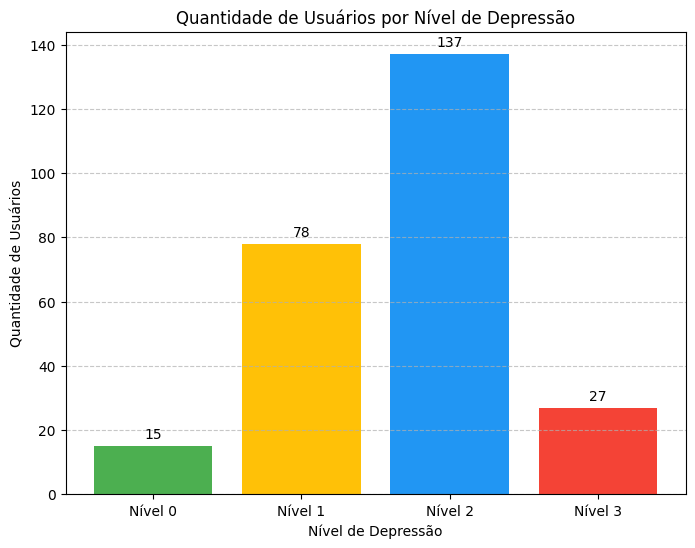

In [6]:
# Plotar o gráfico de barras
fig, ax = plt.subplots(figsize=(8,6))  # Define o tamanho da figura

niveis = ['Nível 0', 'Nível 1', 'Nível 2', 'Nível 3']
quantidades = [quant_usuario_nivel_0, quant_usuario_nivel_1, quant_usuario_nivel_2, quant_usuario_nivel_3]

# Verifique se as quantidades são números e não são todos zeros
print("Quantidades:", quantidades)

# Plotar as barras com cores diferentes
ax.bar(niveis, quantidades, color=['#4CAF50', '#FFC107', '#2196F3', '#F44336'])

# Adicionar rótulos e título
ax.set_ylabel('Quantidade de Usuários')
ax.set_xlabel('Nível de Depressão')
ax.set_title('Quantidade de Usuários por Nível de Depressão')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar rótulos nas barras
for i, v in enumerate(quantidades):
    ax.text(i, v + max(quantidades)*0.01, str(v), ha='center', va='bottom')

# Salvar a figura antes de mostrar
plt.savefig('dados/filtro_nivel/quantidade_usuarios_por_nivel_depressao_6meses.png', bbox_inches='tight')

plt.show()

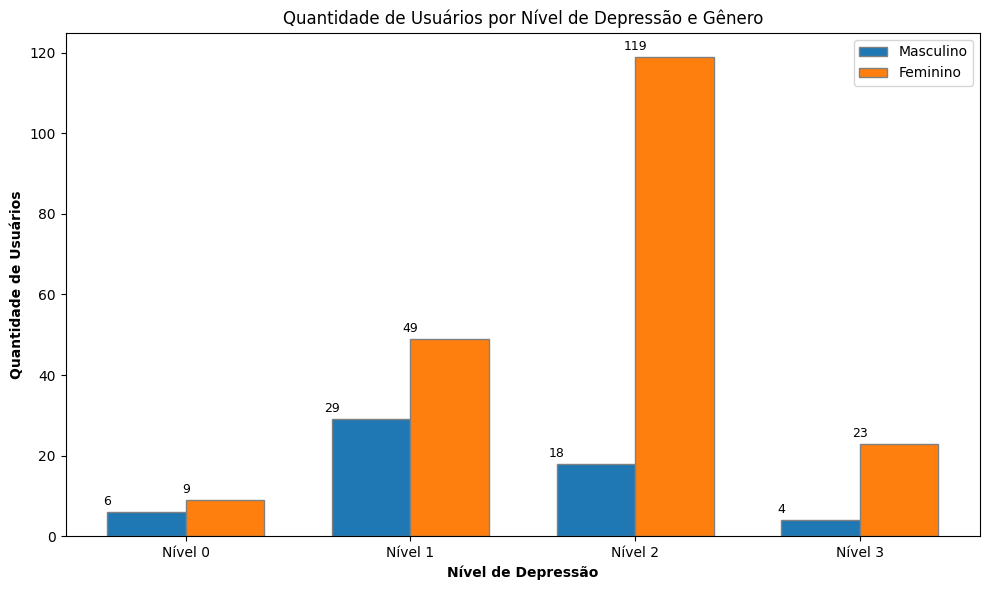

In [7]:
# Níveis de depressão
niveis = ['Nível 0', 'Nível 1', 'Nível 2', 'Nível 3']

# Quantidades por nível
quantidades = [quant_usuario_nivel_0, quant_usuario_nivel_1, quant_usuario_nivel_2, quant_usuario_nivel_3]

# Quantidades por nível e gênero
quantidades_masculino = [quant_usuario_nivel_0_masculino, quant_usuario_nivel_1_masculino, quant_usuario_nivel_2_masculino, quant_usuario_nivel_3_masculino]
quantidades_feminino = [quant_usuario_nivel_0_feminino, quant_usuario_nivel_1_feminino, quant_usuario_nivel_2_feminino, quant_usuario_nivel_3_feminino]


# Definir a largura das barras
bar_width = 0.35

# Definir a posição das barras no eixo X
r1 = np.arange(len(niveis))
r2 = [x + bar_width for x in r1]

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

# Barras para Masculino
ax.bar(r1, quantidades_masculino, color='#1f77b4', width=bar_width, edgecolor='grey', label='Masculino')

# Barras para Feminino
ax.bar(r2, quantidades_feminino, color='#ff7f0e', width=bar_width, edgecolor='grey', label='Feminino')

# Adicionar rótulos e título
ax.set_xlabel('Nível de Depressão', fontweight='bold')
ax.set_ylabel('Quantidade de Usuários', fontweight='bold')
ax.set_title('Quantidade de Usuários por Nível de Depressão e Gênero')

# Adicionar ticks no eixo X
ax.set_xticks([r + bar_width / 2 for r in range(len(niveis))])
ax.set_xticklabels(niveis)

# Adicionar legenda
ax.legend()

# Adicionar rótulos nas barras
for i in range(len(niveis)):
    ax.text(r1[i] - bar_width/2, quantidades_masculino[i] + 1, quantidades_masculino[i], ha='center', va='bottom', fontsize=9)
    ax.text(r2[i] - bar_width/2, quantidades_feminino[i] + 1, quantidades_feminino[i], ha='center', va='bottom', fontsize=9)

# Ajustar layout e salvar a figura
plt.tight_layout()
plt.savefig('dados/filtro_nivel/quantidade_usuarios_por_nivel_depressao_e_genero_6meses.png', dpi=300)
plt.show()

In [8]:
# Filtrando documentos com o atributo maior que 3
filtro = {"nivel": {"$eq": 3}}
documentos = collection.find(filtro)

In [9]:
# Transformando os documentos em um DataFrame
df = pd.DataFrame(list(documentos))
print(df.dtypes)

_id                         object
idade                        int64
sexo                        object
id_usuario                  object
nivel                      float64
pessimismo                  object
tristeza                    object
fracasso                    object
prazer                      object
culpa                       object
punicao                     object
estima                      object
critica                     object
suicida                     object
choro                       object
agitacao                    object
interesse                   object
indecisao                   object
desvalorizacao              object
energia                     object
sono                        object
irritabilidade              object
apetite                     object
concentracao                object
fadiga                      object
int_sexo                    object
quantAmigos                 object
postStory                   object
postCreated_time    

In [10]:
# Lista de colunas que precisam ser convertidas
colunas_para_converter = [
    'pessimismo', 'tristeza', 'fracasso', 'prazer', 'culpa', 'punicao', 'estima',
    'critica', 'suicida', 'choro', 'agitacao', 'interesse', 'indecisao',
    'desvalorizacao', 'energia', 'sono', 'irritabilidade', 'apetite',
    'concentracao', 'fadiga', 'int_sexo', 'quantAmigos'
]

# Preencher os NaNs com 0
df[colunas_para_converter] = df[colunas_para_converter].fillna(0)

df[colunas_para_converter] = df[colunas_para_converter].astype('int64')

In [11]:
# Salvar o DataFrame em um arquivo CSV
df.to_csv('dados/filtro_nivel/nivel3/6meses/so_nivel3_6_meses.csv', index=False)

In [12]:
extrator = ExtracaoInteracao(df)

# Extrair as interações e obter o DataFrame atualizado
df_com_interacoes = extrator.extract_interactions()

In [13]:
df.to_csv('dados/filtro_nivel/nivel3/6meses/interacoes.csv', index=False)

# Utilizando o Facebook Prophet para prever a quantidade de posts

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw3k49ofm/b7vguimd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw3k49ofm/cl18e5b0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/home/paulovss/Documentos/projects/python/analise_dados/venv/lib/python3.12/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80446', 'data', 'file=/tmp/tmpw3k49ofm/b7vguimd.json', 'init=/tmp/tmpw3k49ofm/cl18e5b0.json', 'output', 'file=/tmp/tmpw3k49ofm/prophet_modelql0aq1mu/prophet_model-20240919213447.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:34:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:34:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done 

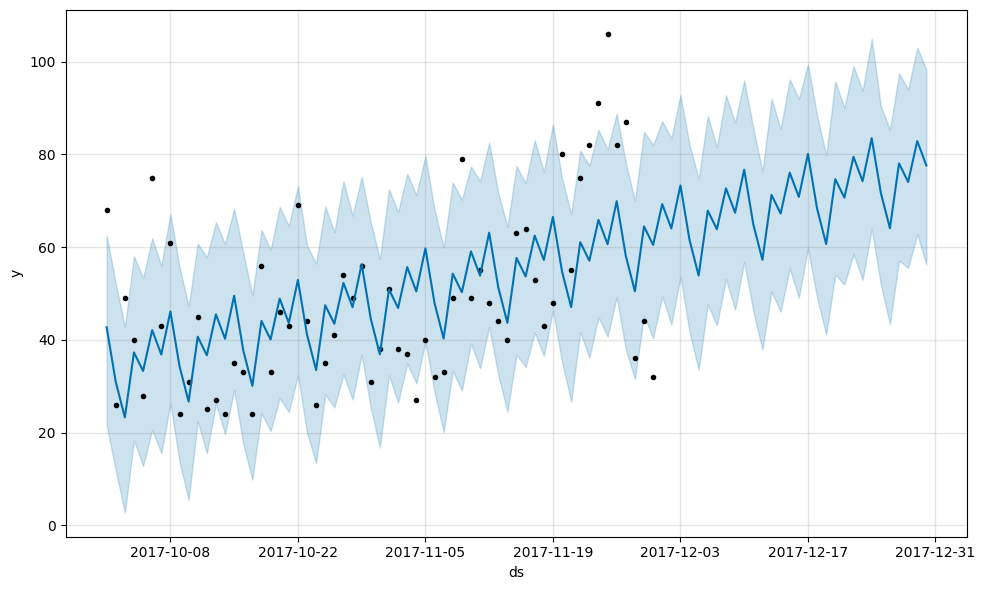

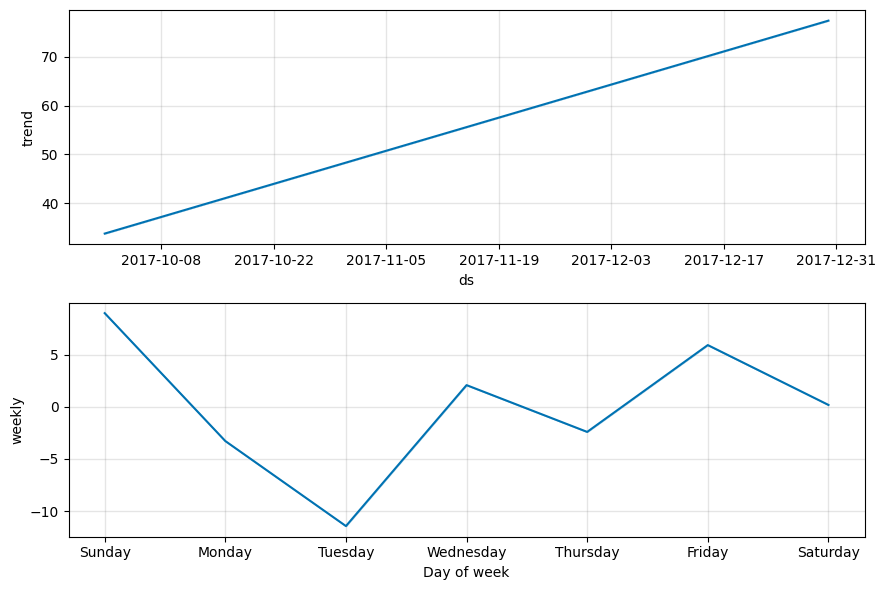

In [14]:
facebook_prophet = FacebookProphet()

facebook_prophet.prophet(df, 'postCreated_time')

# Plotar quantidade de posts por usuário

In [15]:
plot_graphs = PlotGraphs()

# Agrupar por usuário, mês e ano
posts_grouped = df.groupby(['id_usuario', 'mes', 'ano']).size().reset_index(name='quantidade')

# Adicionar coluna com o período e converter para datetime
posts_grouped['periodo'] = pd.to_datetime(posts_grouped['mes'].astype(str) + '/' + posts_grouped['ano'].astype(str),
                                          format='%m/%Y')

# Deve retornar 0 se a conversão foi bem-sucedida.
print(posts_grouped['periodo'].isnull().sum())

posts_grouped.dtypes

0


id_usuario            object
mes                    int64
ano                    int64
quantidade             int64
periodo       datetime64[ns]
dtype: object

In [16]:
# plot_graphs.plot_posts_per_user(posts_grouped, 'dados/filtro_nivel/nivel3/6meses/graficos')

# Efentuando a limpeza dos dados

In [17]:
tratamento_texto = TextTreatment()

/home/paulovss/Documentos/projects/python/analise_dados/venv/lib/python3.12/site-packages/stanza/models/tokenization/trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental featur

In [18]:
df['postMessageLimpo'] = df['postMessage'].fillna('').progress_apply(
    lambda texto: tratamento_texto.preprocessamento_texto(texto) if texto else '')

  0%|          | 0/2942 [00:00<?, ?it/s]

In [19]:
# Exibir apenas as colunas postMessage e postMessageLimpo
df[['postMessage', 'postMessageLimpo']].head()

,postMessage,postMessageLimpo
0,NaN,
1,NaN,
2,NaN,
3,NaN,
4,NaN,


In [20]:
busca_palavras = BuscaPalavras()

In [21]:
resultado = busca_palavras.string_matching(df['postMessageLimpo'], 'dados/datasets/termos_depressivos_pt_br.txt')
# Salvar o resultado em um arquivo CSV
resultado.to_csv('dados/filtro_nivel/nivel3/6meses/so_nivel3_6meses_termos_depressivos.csv')

resultados_fuzzy = busca_palavras.fuzzy_string_matching(df['postMessageLimpo'],
                                                        'dados/datasets/termos_depressivos_pt_br.txt')
df_resultados_fuzzy = pd.DataFrame(resultados_fuzzy,
                                   columns=['Palavra Procurada', 'Palavra Encontrada', 'Similaridade'])
# Salvar o resultado em um arquivo CSV
df_resultados_fuzzy.to_csv('dados/filtro_nivel/nivel3/6meses/so_nivel3_6meses_termos_depressivos_fuzzy.csv', index=False)

In [22]:
# Carregar stopwords para o TF-IDF e o Bag of Words
stop_words = tratamento_texto.get_stopwords()

In [ ]:
text_vectorizer = TextVectorization(df, stop_words)
# Vetorização TF-IDF
resultados_tfidf = text_vectorizer.tfidf_vectorization(
    'dados/filtro_nivel/nivel3/6meses/so_nivel3_6meses_resultados_tfidf_unigramas.csv', 0.60, 2,
    (1, 1))

# Vetorização Bag of Words
resultados_bow = text_vectorizer.bag_of_words_vectorization(
    'dados/filtro_nivel/nivel3/6meses/so_nivel3_6meses_resultados_bow_unigramas.csv',
    0.85, 5, (1, 1))

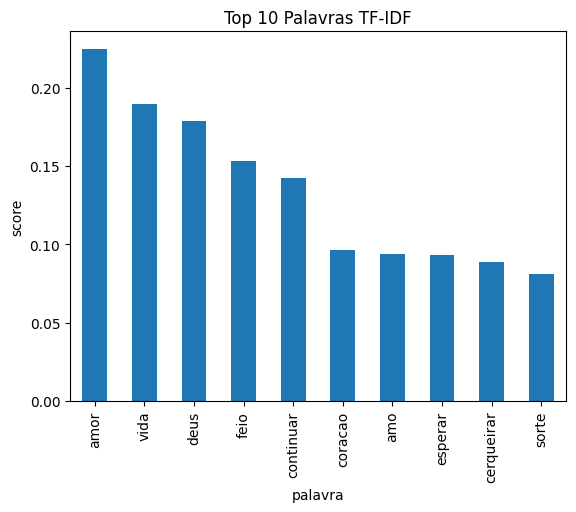

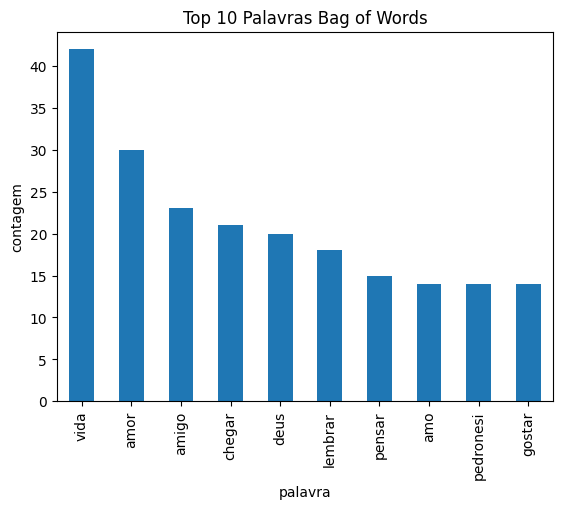

In [24]:
text_vectorizer.plot_top_words(resultados_tfidf, column='score', title='Top 10 Palavras TF-IDF')
text_vectorizer.plot_top_words(resultados_bow, column='contagem', title='Top 10 Palavras Bag of Words')

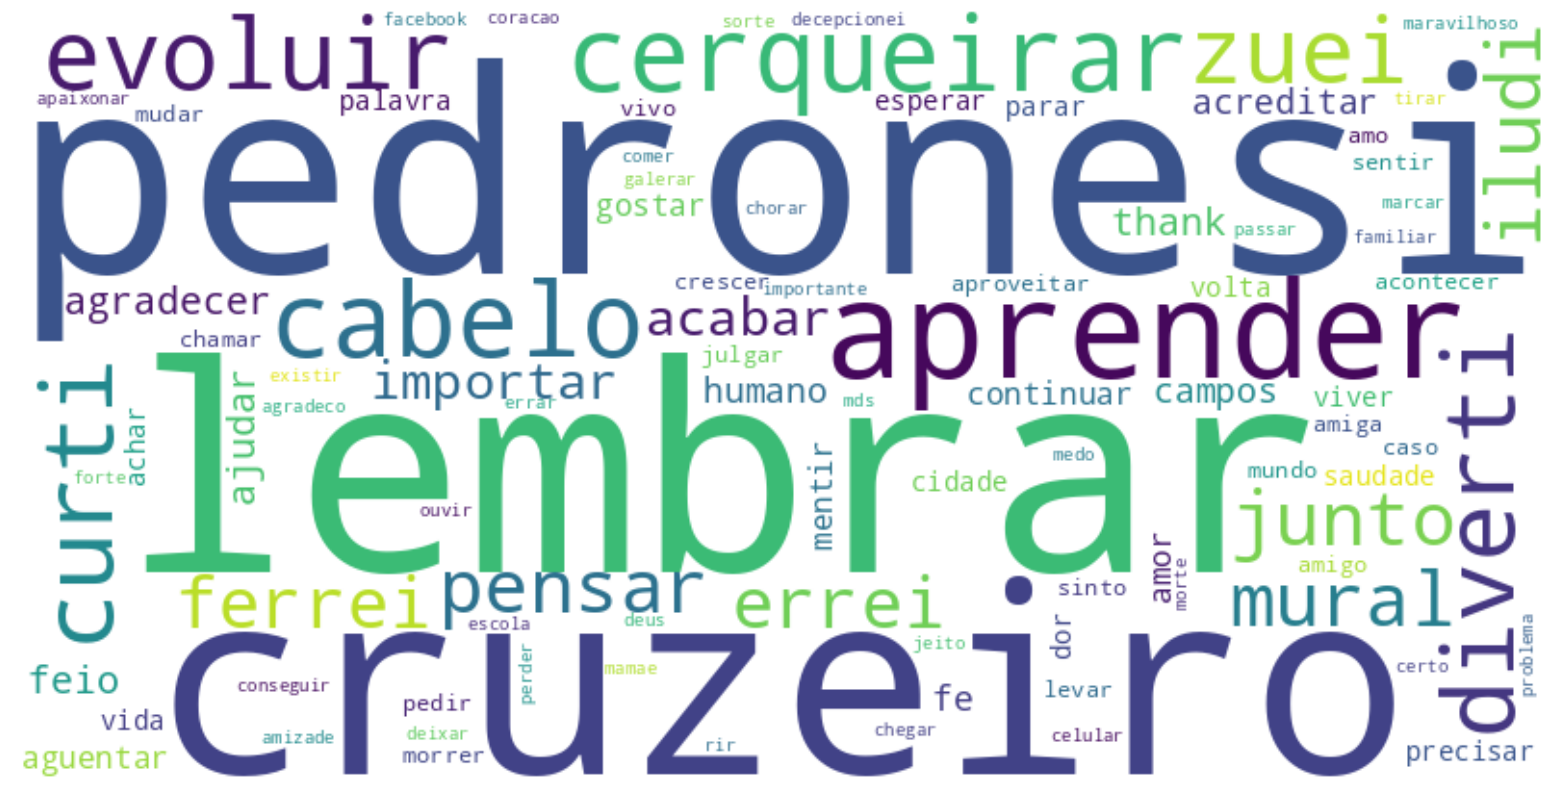

In [25]:
frequencias_bow = dict(zip(resultados_bow['palavra'], resultados_bow['contagem']))

# Gerar e plotar a nuvem de palavras
NuvemPalavras.plot_nuvem_palavras(frequencias_bow)

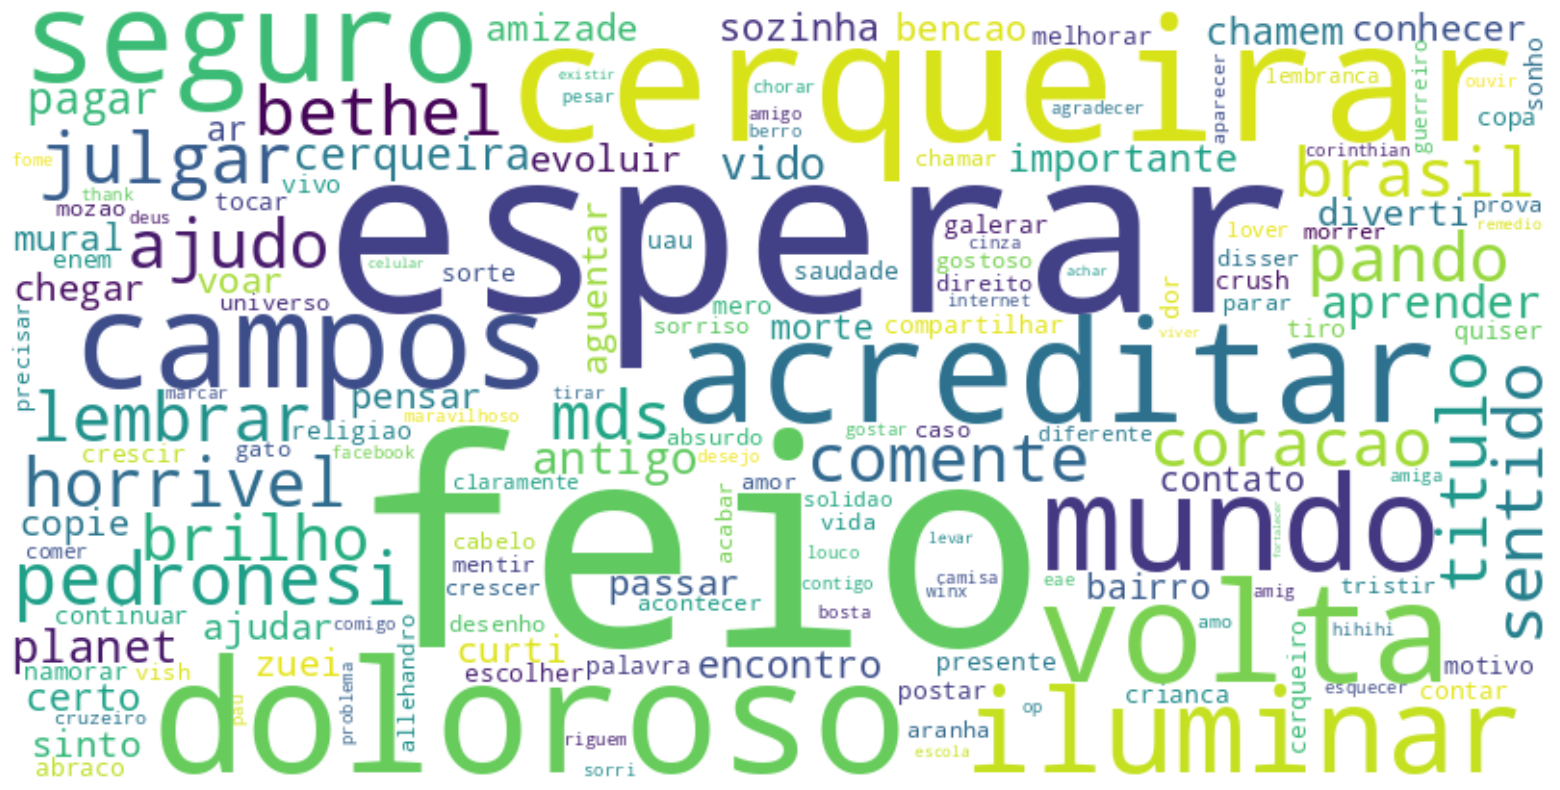

In [26]:
frequencias_tfidf = dict(zip(resultados_tfidf['palavra'], resultados_tfidf['score']))

# Gerar e plotar a nuvem de palavras
NuvemPalavras.plot_nuvem_palavras(frequencias_tfidf)